# Phase 1 - DATA UNDERSTANDING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
pd.set_option("display.max_columns", 100)

In [2]:
df = pd.read_csv('/Users/hibrizi/Project/hotel_booking_user_segmentation/data/hotel_bookings.csv')

print("Dataset shape:", df.shape)
print(df.info())

Dataset shape: (119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  i

In [3]:
display(df.head(10))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
display(df.describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2016.16,0.71,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


In [5]:
for col in df.select_dtypes(include=['object']).columns:
    n_unique = df[col].nunique()
    sample_vals = df[col].unique()[:5]
    print(f"{col:30} → {n_unique:4} unique values | sample: {sample_vals}")

hotel                          →    2 unique values | sample: ['Resort Hotel' 'City Hotel']
arrival_date_month             →   12 unique values | sample: ['July' 'August' 'September' 'October' 'November']
meal                           →    5 unique values | sample: ['BB' 'FB' 'HB' 'SC' 'Undefined']
country                        →  177 unique values | sample: ['PRT' 'GBR' 'USA' 'ESP' 'IRL']
market_segment                 →    8 unique values | sample: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary']
distribution_channel           →    5 unique values | sample: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
reserved_room_type             →   10 unique values | sample: ['C' 'A' 'D' 'E' 'G']
assigned_room_type             →   12 unique values | sample: ['C' 'A' 'D' 'E' 'G']
deposit_type                   →    3 unique values | sample: ['No Deposit' 'Refundable' 'Non Refund']
customer_type                  →    4 unique values | sample: ['Transient' 'Contract' 'Transie

In [6]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'MissingCount': missing, 'MissingPercent': missing_pct})
display(missing_df)

,MissingCount,MissingPercent
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00



📊 Cancellation Rate: 37.04%


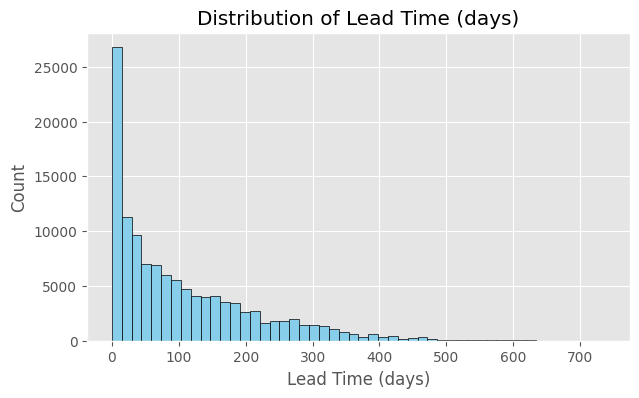

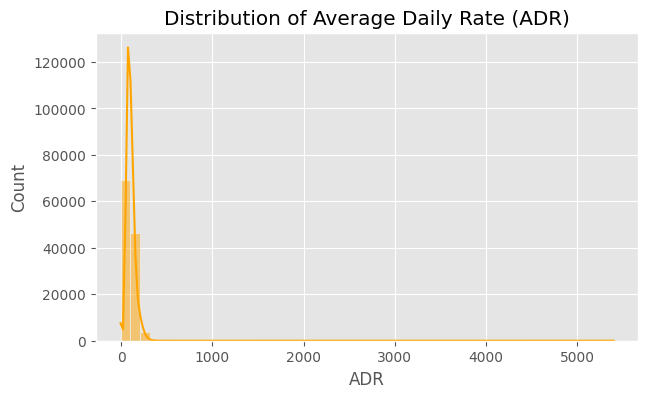


💰 Average ADR per Customer Type:


customer_type
Transient          107.013621
Contract            87.549637
Transient-Party     86.084253
Group               83.488579
Name: adr, dtype: float64


🛫 Top Market Segments:


market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

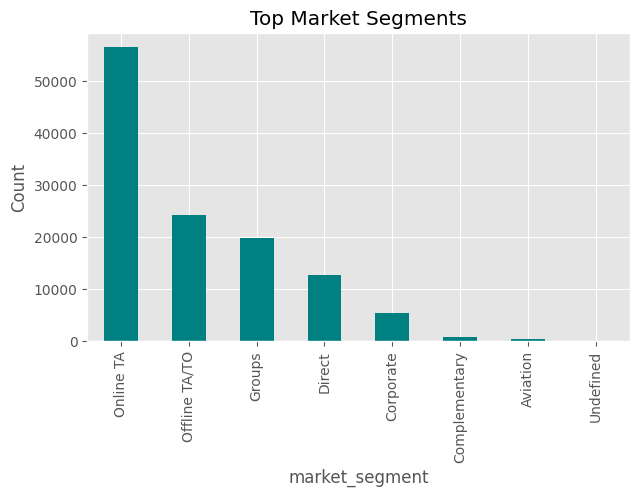

In [7]:
# Cancellation rate
cancel_rate = df['is_canceled'].mean()
print(f"\n📊 Cancellation Rate: {cancel_rate:.2%}")

# Distribution of lead time
plt.figure(figsize=(7,4))
df['lead_time'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Lead Time (days)")
plt.xlabel("Lead Time (days)")
plt.ylabel("Count")
plt.show()

# ADR distribution
plt.figure(figsize=(7,4))
sns.histplot(df['adr'], bins=50, color='orange', kde=True)
plt.title("Distribution of Average Daily Rate (ADR)")
plt.xlabel("ADR")
plt.ylabel("Count")
plt.show()

# Average ADR by customer type
if 'customer_type' in df.columns:
    avg_adr_by_type = df.groupby('customer_type')['adr'].mean().sort_values(ascending=False)
    print("\n💰 Average ADR per Customer Type:")
    display(avg_adr_by_type)

# Top 10 market segments
if 'market_segment' in df.columns:
    seg_counts = df['market_segment'].value_counts().head(10)
    print("\n🛫 Top Market Segments:")
    display(seg_counts)
    seg_counts.plot(kind='bar', figsize=(7,4), color='teal', title='Top Market Segments')
    plt.ylabel("Count")
    plt.show()

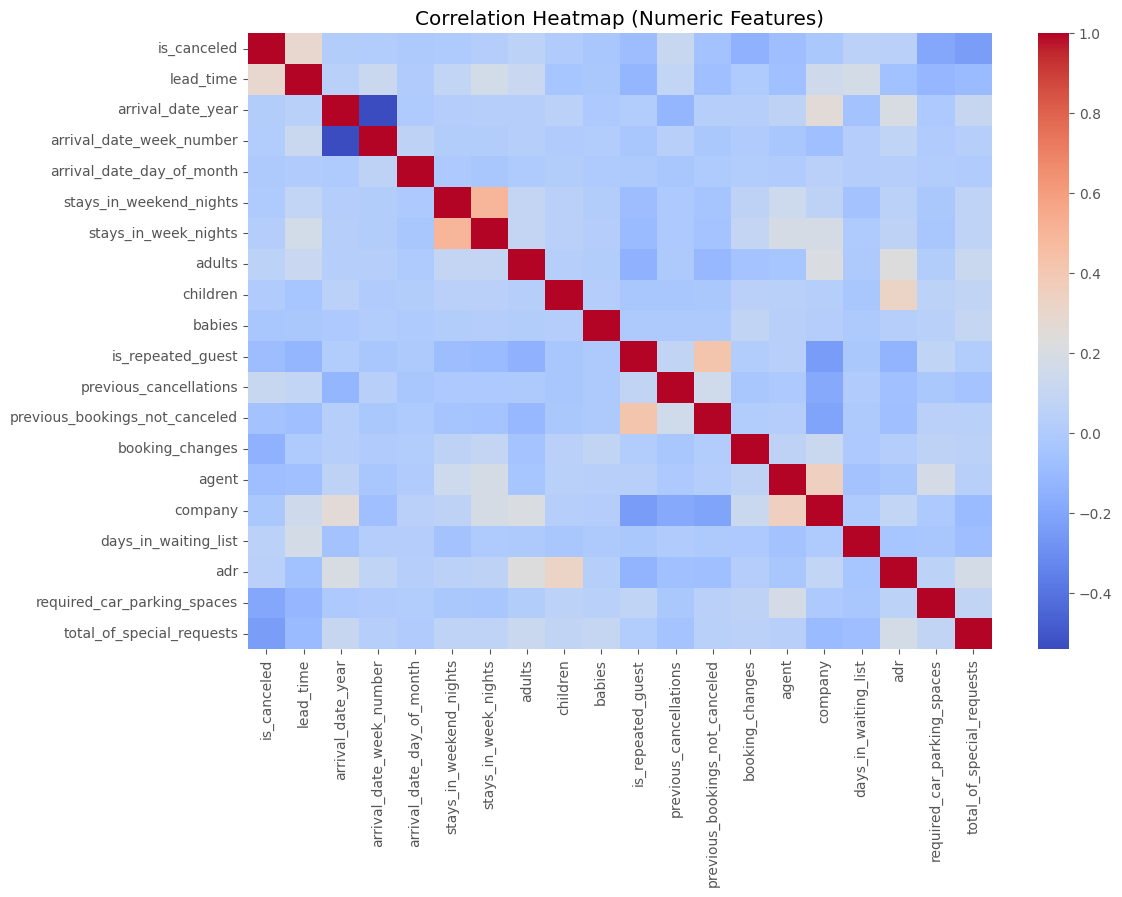

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [11]:
print("""
Potential Behavioral Features for Modelling:

| Business Aspect        | Dataset Columns                                    | Note                           |
|------------------------|----------------------------------------------------|--------------------------------|
| Booking Behavior       | is_canceled, booking_changes                       | Cancellation & Modifications   |
| Frequency & Loyalty    | is_repeated_guest, previous_bookings_not_canceled  | Repeat User Indicators         |
| Monetary               | adr, stays_in_week_nights, stays_in_weekend_nights | Spending Level / Value         |
| Channel/Promo          | market_segment, distribution_channel               | Booking Preferences            |
| Time Planning          | lead_time, arrival_date_*                          | Planner vs Impulsif Booking    |
| Engagement             | total_of_special_requests                          | Service Engagement Level       |
| Risk Profile           | deposit_type, previous_cancellations               | Refund / Cancellation Risk     |
| Guest Type             | customer_type                                      | Corporate / Transient Segments |
""")


Potential Behavioral Features for Modelling:

| Business Aspect        | Dataset Columns                                    | Note                           |
|------------------------|----------------------------------------------------|--------------------------------|
| Booking Behavior       | is_canceled, booking_changes                       | Cancellation & Modifications   |
| Frequency & Loyalty    | is_repeated_guest, previous_bookings_not_canceled  | Repeat User Indicators         |
| Monetary               | adr, stays_in_week_nights, stays_in_weekend_nights | Spending Level / Value         |
| Channel/Promo          | market_segment, distribution_channel               | Booking Preferences            |
| Time Planning          | lead_time, arrival_date_*                          | Planner vs Impulsif Booking    |
| Engagement             | total_of_special_requests                          | Service Engagement Level       |
| Risk Profile           | deposit_type, previous

In [10]:
print("\n===== EXECUTIVE SUMMARY =====")
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Cancellation rate: {cancel_rate:.2%}")
print(f"Columns with missing values: {len(missing_df)}")
print("\nTop 5 numeric columns by variance:")
display(df.select_dtypes('number').var().sort_values(ascending=False).head(5))
print("\nData Understanding Phase complete")


===== EXECUTIVE SUMMARY =====
Total records: 119,390
Total columns: 32
Cancellation rate: 37.04%
Columns with missing values: 4

Top 5 numeric columns by variance:


company                 17333.042879
agent                   12271.000406
lead_time               11419.721511
adr                      2553.866100
days_in_waiting_list      309.574203
dtype: float64


Data Understanding Phase complete


# Hotel Booking Demand Dataset - Summary of Findings 

## 1. Overview
The dataset contains **119,390 hotel booking entries** across two property types: *Resort Hotel* and *City Hotel*.  
It consists of **32 columns** describing booking characteristics such as lead time, Average Daily Rate (ADR), cancellation status, customer type, and booking channels (market segment).

Key initial findings:
- Four columns contain missing values: `company`, `agent`, `children`, and `country`.
- The `company` column has the highest missing value ratio (~94%), making it a candidate for removal or imputation.
- Overall, the dataset is clean and suitable for advanced analysis.

---

## 2. Cancellation Behavior
The dataset shows a cancellation rate of **37.04%**, equivalent to around **44,000 cancellations** from a total of 119K bookings.  
Correlation analysis reveals that `lead_time` has a **positive correlation** with `is_canceled` (≈ 0.3).  
This indicates that longer lead times increase the likelihood of cancellation.

**Behavioral rationale:**  
Customers booking far in advance tend to have more flexible schedules, making them more prone to changing plans.

**Insight:**  
To reduce cancellations among long lead-time customers:
- send booking reminders,  
- offer loyalty incentives,  
- provide non-refundable promotional rates.

---

## 3. Lead Time Patterns
Lead time distribution is **right-skewed**:
- Most customers book **less than 30 days** before arrival.
- A minority book **over 300 days** in advance.

This reveals two booking behavior groups:
- **Impulsive Bookers:** book close to the arrival date, tend to be price-sensitive.  
- **Planner Bookers:** book far in advance, more structured, potentially more loyal.

**Insight:**  
Lead time segmentation can help personalize customer strategies:
- Last-minute users → limited-time promotions  
- Early planners → early-bird rewards and booking reminders

> Note: Planner-type bookings show higher cancellation risk despite their loyalty tendency.

---

## 4. Average Daily Rate (ADR)
The average **ADR** ranges between **100–120**, with extreme outliers above **5000**.  
ADR distribution is right-skewed, showing significant price variation influenced by room type, seasonality, or booking channel.

Based on customer type:
- **Transient** customers have the highest average ADR (~107).  
- **Contract** and **Group** customers show lower ADR (≈83–87).

**Insight:**  
ADR is a key indicator of spending behavior.  
Log transformation or winsorization is recommended to minimize the impact of extreme outliers.

---

## 5. Market Segment Insights
Booking channel distribution:
- **Online Travel Agencies (OTA)** dominate with ~47% of total bookings.
- Other channels include Offline TA/TO, Groups, and Direct bookings.

OTA customers are often **promo-driven**, while direct bookers typically demonstrate higher loyalty and greater profitability.

**Insight:**  
Market segment strongly reflects customer behavior:
- OTA users → price-sensitive, promotion-oriented  
- Direct bookers → loyalty-driven and higher retention

---

## 6. Correlation Analysis
Important correlations:
- **Lead time ↔ Cancellation:** longer lead time increases cancellation probability.  
- **Repeated guest ↔ Previous non-canceled bookings:** strong indicators of loyalty.  
- **Weekday ↔ Weekend stays:** reflects longer stays.

Most other correlations are low, making the dataset stable for multivariate analysis like clustering.

---

## 7. Data Variability
Top five columns with the highest variance:

| Column | Variance | Description |
|--------|---------:|-------------|
| `company` | 17,333 | Mostly missing; not relevant for modeling |
| `agent` | 12,271 | Highly varied agent IDs; may require grouping |
| `lead_time` | 11,419 | Large spread in booking timing |
| `adr` | 2,553 | Significant variation in customer spending |
| `days_in_waiting_list` | 309 | Variation in confirmation waiting time |

High variance in `lead_time` and `adr` highlights their importance in customer differentiation.

---

## 8. General Conclusion

| Aspect | Key Findings | Implications |
|--------|--------------|--------------|
| **Data Quality** | 4 columns contain missing values | Ready for analysis after minor preprocessing |
| **Cancellation Rate** | 37% cancellations | Requires mitigation strategies |
| **Booking Time Behavior** | Majority book <30 days; minority >300 days | Indicates two customer groups |
| **ADR Pattern** | Avg 100–120; extreme outliers present | Needs transformation |
| **Booking Channels** | OTA dominates (>45%) | Majority are promo-driven customers |
| **Important Correlations** | Lead time ↔ Cancellation; Loyalty ↔ Previous bookings | Crucial for segmentation |

---

## 9. Strategic Conclusions
The dataset supports forming at least **three behavioral customer clusters**:

1. **High-Value Loyal Customers**  
   High ADR, repeated bookings, and prefer direct booking channels.

2. **Promo-Driven OTA Users**  
   Highly sensitive to price and promotional offers.

3. **Planner Corporate Travelers**  
   Book far in advance, generally loyal, but show higher cancellation risk.

The dataset is suitable for **unsupervised learning**, especially **K-Means** for customer segmentation.

---
